Import the Dependencies

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Data Collection and Preprocessing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [4]:
# printing first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# printing last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# number of row and columns in the dataset
heart_data.shape

(303, 14)

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
# statistical for missing values
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# cheking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


Spliting the Features and Target

In [11]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [12]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Spliting the Data into Training Data and Test Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 2)

In [15]:
X.shape, X_train.shape, X_test.shape

((303, 13), (242, 13), (61, 13))

Model Training

In [16]:
model = LogisticRegression(max_iter=1000)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

**Accuracy Score**

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# accuracy on training data
X_train_pred = model.predict(X_train)

In [20]:
train_data_accuracy = accuracy_score(y_train, X_train_pred)

In [21]:
train_data_accuracy

0.8553719008264463

In [22]:
# accuracy on test data
X_test_pred = model.predict(X_test)

In [23]:
test_data_accuracy = accuracy_score(y_test, X_test_pred)

In [24]:
test_data_accuracy

0.8032786885245902

**Precision**

Presicion is the ratio of number of True Positive to the total number of Predicted Positive Positive. It measures, out of the total predicted positive, how many are actually positive.

In [25]:
from sklearn.metrics import precision_score

In [26]:
# precision for training data predictions
precision_train = precision_score(y_train, X_train_pred)

In [27]:
precision_train

0.8299319727891157

In [28]:
# precision for test data predictions
precision_test = precision_score(y_test, X_test_pred)

In [29]:
precision_test

0.8181818181818182

**Recall**

Recall is the ratio of number of True Positive to the total number of Actual Positive. It measures, out of the total actual positive, how many are predicted as True Positive.

In [30]:
from sklearn.metrics import recall_score

In [31]:
# recall for training data predictions
recall_train = recall_score(y_train, X_train_pred)

In [32]:
recall_train

0.9242424242424242

In [33]:
# recall for test data predictions
recall_test = recall_score(y_test, X_test_pred)

In [34]:
recall_test

0.8181818181818182

**F1 Score**

F1 Score is an important evaluation metric for binary classification that combines Precision & Recall. F1 Score is the harmonic mean of Precision & Recall.

In [35]:
from sklearn.metrics import f1_score

In [36]:
# f1 score for training data predictions
f1_score_train = f1_score(y_train, X_train_pred)

In [37]:
f1_score_train

0.8745519713261649

In [38]:
# f1 score on test data predictions
f1_score_test = f1_score(y_test, X_test_pred)

In [39]:
f1_score_test

0.8181818181818182

## **Precision, Recall, & F1 Score - function**

---



In [40]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [41]:
# classification metrics for training data
precision_recall_f1_score(y_train, X_train_pred)

Precision = 0.8299319727891157
Recall = 0.9242424242424242
F1 Score = 0.8745519713261649


In [42]:
# classification metrics for test data
precision_recall_f1_score(y_test, X_test_pred)

Precision = 0.8181818181818182
Recall = 0.8181818181818182
F1 Score = 0.8181818181818182


## **ROC Curve and AUC Curve**

---



In [43]:
import matplotlib.pyplot as plt

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
# Compute ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, X_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, X_test_pred)

In [48]:
# Compute AUC
auc_train = roc_auc_score(y_train, X_train_pred)
auc_test = roc_auc_score(y_test, X_test_pred)

In [49]:
print("AUC for Training Data:", auc_train)
print("AUC for Test Data:", auc_test)

AUC for Training Data: 0.8484848484848484
AUC for Test Data: 0.801948051948052


**Training Data ROC Curve**

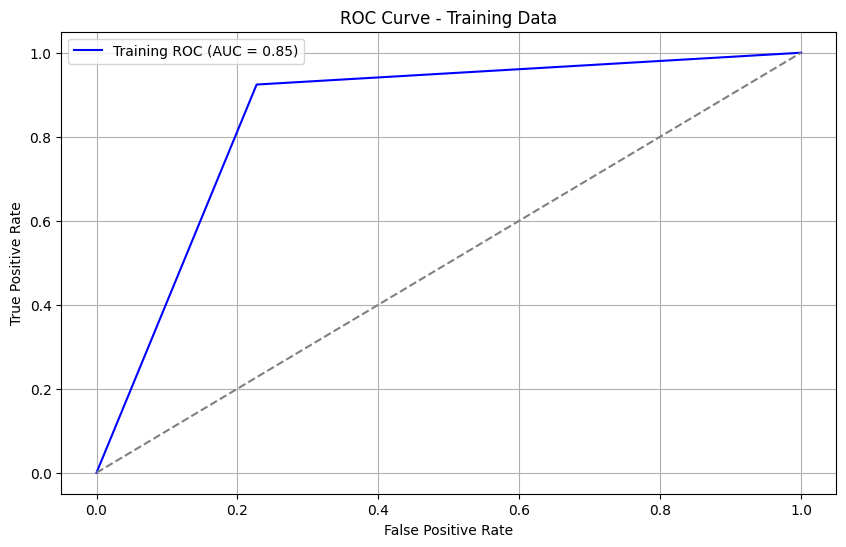

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend()
plt.grid()
plt.show()

**Code for Test Data ROC Curve**

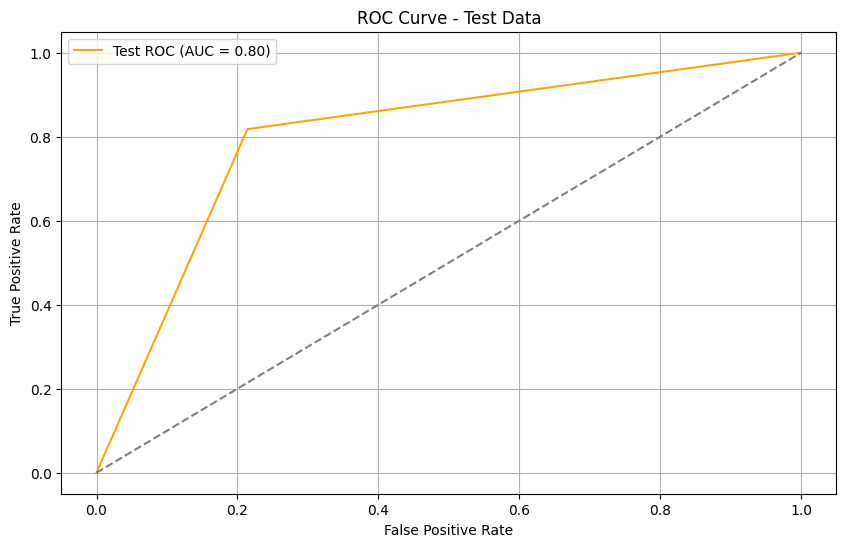

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.legend()
plt.grid()
plt.show()

**Plot the ROC Curve**

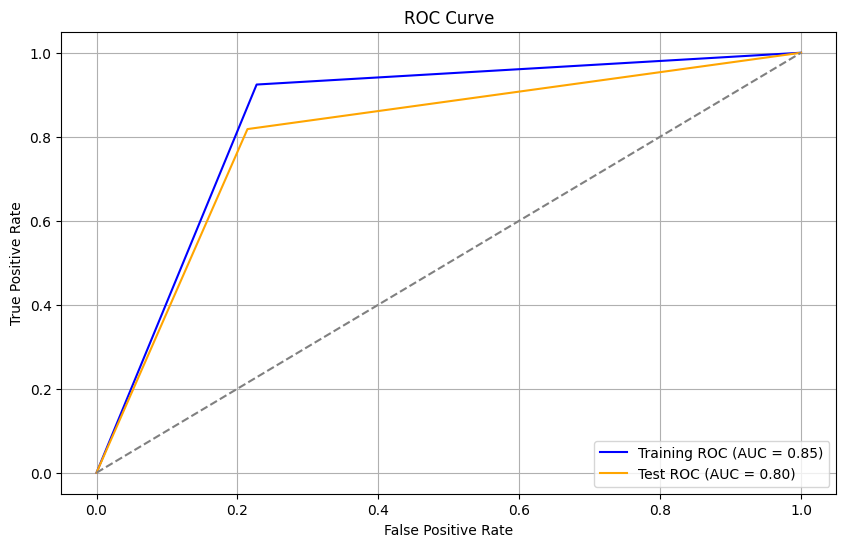

In [52]:
plt.figure(figsize=(10, 6))

# Plot training ROC
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.2f})', color='blue')

# Plot test ROC
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='orange')

# Diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()